**Students Performance in Exams**



# Libraries Preparation

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Google Mounting
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Dataframe

In [3]:
# Load data
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Portofolio/StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Dari dataset yang dipilih terdapat beberapa kolom antara lain:
*   gender =  jenis kelamin siswa
*   race/ethnicity = kelompok ras/etnis siswa
*   parental level of education = tingkat edukasi tertinggi orang tua siswa
*   lunch = jenis makan siang siswa
*   test preparation course = keikutan serta siswa dalam persiapan belajar
*   math score = nilai kemampuan matematika
*   reading score = nilai kemampuan membaca
*   writing score = nilai kemampuan menulis












In [6]:
# Show number of columns and rows
data.shape

(1000, 8)

Dataframe ini memiliki 1000 kolom dan 8 baris pada awalnya.

In [7]:
# Concise summary of DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


Dataframe ini memiliki:
*   Empat kolom bertipe data object yaitu gender, race/ethnicity, parental level education, lunch dan test preparation course
*   Tiga kolom bertipe integer yaitu math score, reading score dan writing score


# Missing Values

In [8]:
# Check missing value using .isnull()
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

Seluruh kolom pada dataframe ini tidak memiliki missing values

# Duplicated Data

In [9]:
# Number of duplicated data
data.duplicated().sum()

0

Seluruh kolom pada dataframe ini tidak memiliki nilai/data yang duplikat

# Statistical Summary

In [10]:
# Group column names based on type
categoricals = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
numericals = ['math score', 'reading score', 'writing score']

Kolom-kolom dikelompokan berdasarkan jenis datanya untuk mempermudah analisis

In [11]:
# Numerical statistical sumMary
data[numericals].describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


Berdasarkan ringkasan statistik yang diperoleh dapat dinyatakan untuk kolom math score, reading score dan writing score memiliki data yang terdisbusi normal dikarenakan dapat dilihat dari nilai mean dan median(50%) yang tidak teralu jauh perbedaanya.

In [13]:
# Categorical statistical sumary
data[categoricals].describe()

,gender,race/ethnicity,parental level of education,lunch,test preparation course
count,1000,1000,1000,1000,1000
unique,2,5,6,2,2
top,female,group C,some college,standard,none
freq,518,319,226,645,642


Berdasarkan ringkasan statistik untuk data-data jenis kategorikal diperoleh bahwa:
*   kolom gender memiliki 2 jenis nilai data
*   kolom race/ethnicity memiliki 5 jenis nilai data
*   kolom parental level of education memiliki 6 jenis nilai data
*   kolom lunch memiliki 2 jenis nilai data
*   kolom test preparation course memiliki 2 jenis nilai data





# Data Vizualitation

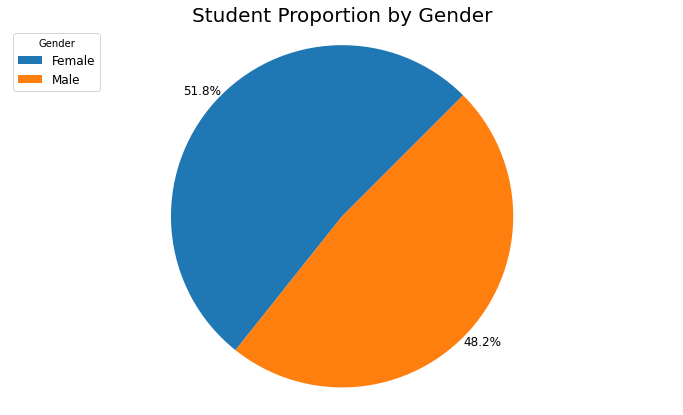

In [16]:
# Student Proportion by Gender
gender_counts = data["gender"].value_counts()
ax = gender_counts.plot(kind='pie',
             figsize = (12,7),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('Student Proportion by Gender', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(labels=["Female", "Male"], loc="upper left", title="Gender", fontsize=12);

Proporsi jumlah mahasiswa perempuan lebih banyak dibandingkan jumlah mahasiswa laki-laki.

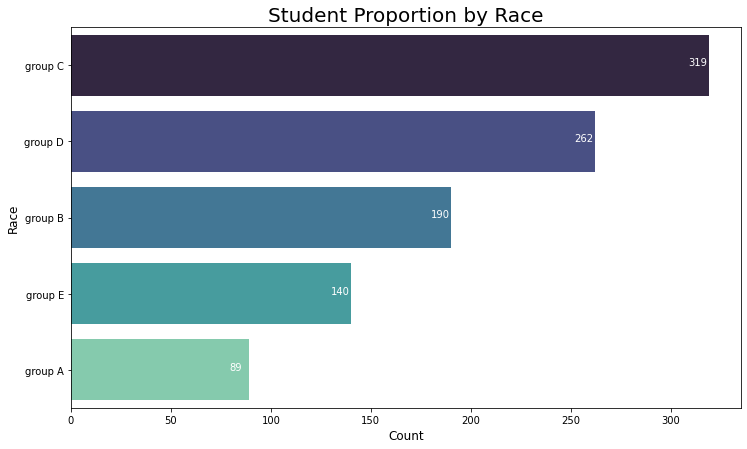

In [17]:
# Student Proportion by Race
race_value_counts = data['race/ethnicity'].value_counts()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=race_value_counts.values, y=race_value_counts.index, orient='h', palette='mako')
ax.set_title("Student Proportion by Race", size=20)
ax.set_xlabel(xlabel="Count", size=12)
ax.set_ylabel(ylabel="Race", size=12)

# Annotate value labels to each group
for index, value in enumerate(race_value_counts): 
    plt.annotate(value, xy=(value-10, index), color='white') 

Kelompok ras grup C merupakan yang terbanyak dan kelompok ras grup A merupakan yang paling sedikit jumlahnya diantara siswa.

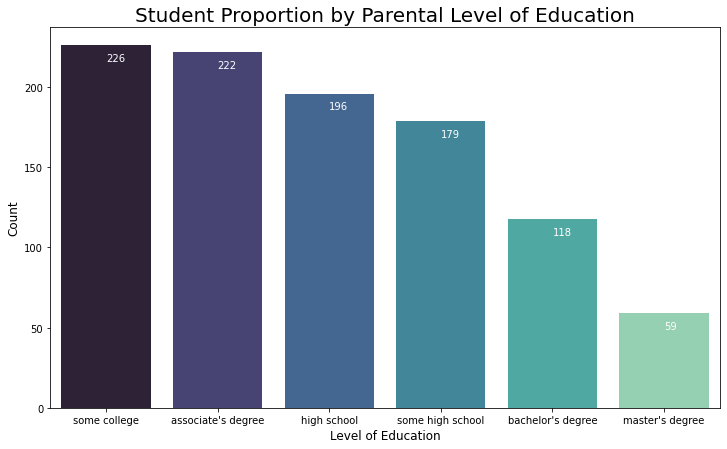

In [18]:
# Student Proportion by Parental Level of Education
level_education_value_counts = data['parental level of education'].value_counts()
plt.figure(figsize=(12,7))
ax = sns.barplot(x=level_education_value_counts.index, y=level_education_value_counts.values, palette='mako')
ax.set_title("Student Proportion by Parental Level of Education", size=20)
ax.set_xlabel(xlabel="Level of Education", size=12)
ax.set_ylabel(ylabel="Count", size=12)

# Annotate value labels to each level
for index, value in enumerate(level_education_value_counts): 
    plt.annotate(value, xy=(index, value-10), color='white') 

Jumlah orang tua siswa yang memiliki tingkat edukasi sampai tingkat sarjana merupakan yang paling banyak jumlahnya, sedangkan yang memiliki tingkat edukasi sampai gelas master merupakan yang paling sedikit jumlahnya.

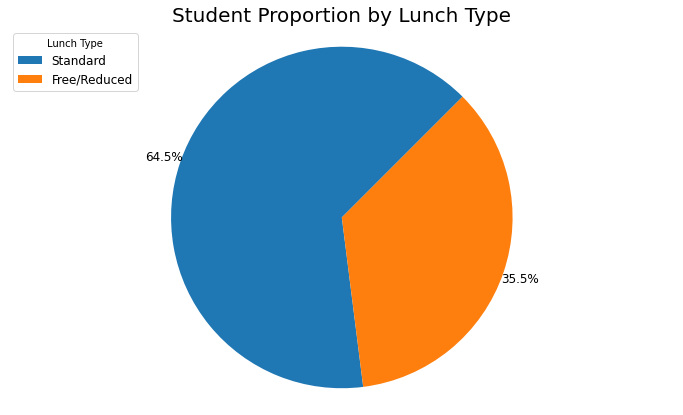

In [20]:
# Student Proportion by Lunch Type
lunch_counts = data["lunch"].value_counts()
ax = lunch_counts.plot(kind='pie',
             figsize = (12,7),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('Student Proportion by Lunch Type', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=["Standard", "Free/Reduced"], title="Lunch Type", fontsize=12);

Jenis makan siang 'standar' merupakan yang dominan diantara siswa.

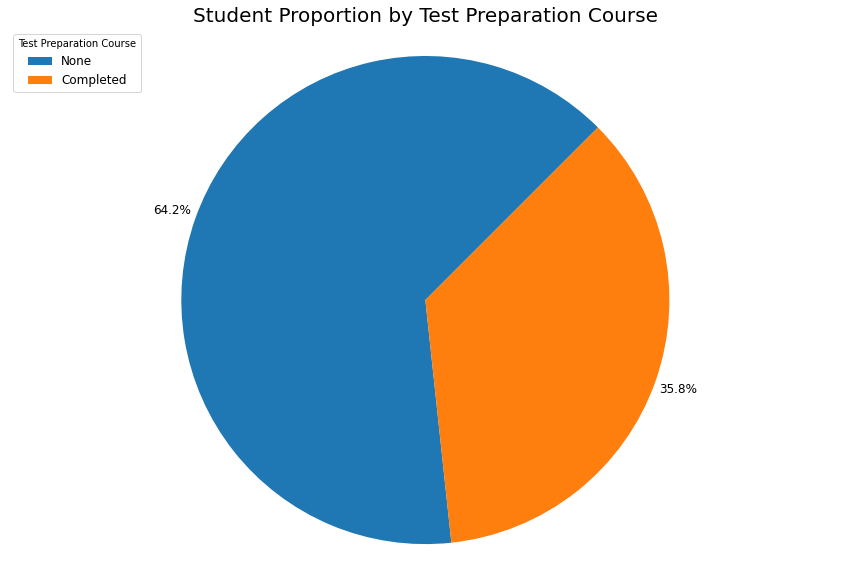

In [21]:
# Student Proportion by Test Preparation Course
test_preparation_counts = data["test preparation course"].value_counts()
ax = test_preparation_counts.plot(kind='pie',
             figsize = (15,10),
             autopct='%1.1f%%', 
             startangle=45,
             labels=None,         
             pctdistance=1.1,    
             textprops={'fontsize': 12})
ax.patch.set_facecolor('white')
plt.title('Student Proportion by Test Preparation Course', size = 20)
ax.set(ylabel=None)
plt.axis('equal') 
plt.legend(loc="upper left", labels=["None", "Completed"], title="Test Preparation Course", fontsize=12);

Mayoritas siswa pada institusi pendidikan tidak mengikuti test persiapan belajar

# EDA

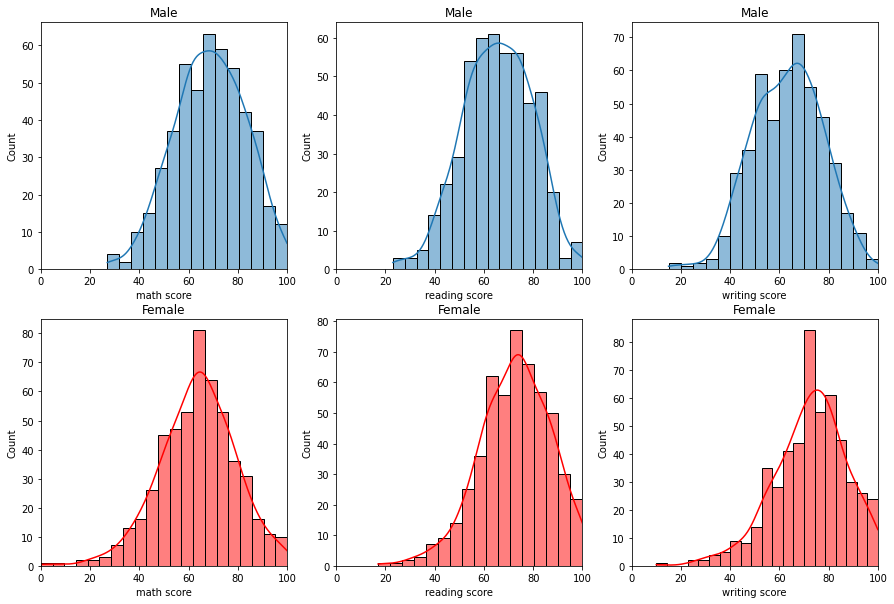

In [22]:
# Numerical Data Distribution
fig , axes = plt.subplots(2,3, figsize=(15,10))
sns.histplot(data[data['gender'] =='male']['math score'],kde=True,ax = axes[0][0])
sns.histplot(data[data['gender'] =='male']['reading score'],kde=True,ax = axes[0][1])
sns.histplot(data[data['gender'] =='male']['writing score'],kde=True,ax = axes[0][2])

sns.histplot(data[data['gender'] =='female']['math score'],kde=True,ax = axes[1][0],color='red')
sns.histplot(data[data['gender'] =='female']['reading score'],kde=True,ax = axes[1][1],color='red')
sns.histplot(data[data['gender'] =='female']['writing score'],kde=True,ax = axes[1][2],color='red')

for i in range(0,3):
    axes[0][i].set_title("Male")
    axes[1][i].set_title("Female")
    
    axes[0][i].set_xlim(0,100)
    axes[1][i].set_xlim(0,100)
plt.show()

Melalui grafik distribusi skor dapat dilihat bahwa skor Pria terdistribusi lebih di tengah dibandingkan dengan wanita

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


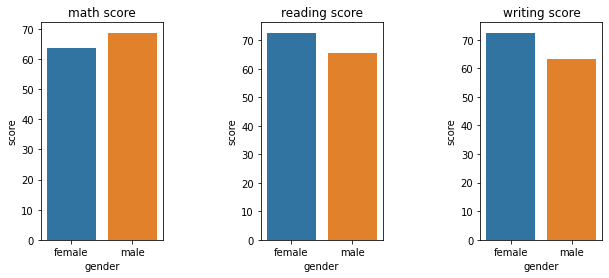

In [23]:
# Student score in every subject distinguished by gender
fig, ax = plt.subplots()
fig.subplots_adjust(hspace=0.8, wspace=0.8, left = 0.2, right = 1.5)
for idx in range(3):
    plt.subplot(1,3, idx+1)
    gender_df = data.groupby("gender")[list(data.columns[-3:])[idx]].describe()
    sns.barplot(gender_df.index, gender_df.loc[:,"mean"].values)
    plt.ylabel("score")
    plt.title(list(data.columns[-3:])[idx])
    
plt.show()

Dapat dilihat bahwa nilai matematika laki-laki lebih tinggi daripada perempuan. Namun, untuk nilai reading dan writing nilai perempuan lebih tinggi daripada laki-laki

Mari kita berikan kategori nilai siswa

Grading
*   90 - 100 = A Grade
*   80 to 89 = B Grade
*   70 to 79 = C Grade
*   60 to 69 = D Grade
*   50 to 59 = E Grade
*   Below 50 = F Grade (Failed)

In [25]:
# Value categorization
grades_mapper = {'A': 90, 'B': 80, 'C': 70, 'D': 60, 'E': 50}

def calc_usa_gpa(score):
    for grade, threshold in grades_mapper.items():
        if score >= threshold:
            return grade
    return 'F'
    
data["math grade"] = data.apply(lambda x : calc_usa_gpa(x["math score"]), axis=1)
data["reading grade"] = data.apply(lambda x : calc_usa_gpa(x["reading score"]), axis=1)
data["writing grade"] = data.apply(lambda x : calc_usa_gpa(x["writing score"]), axis=1)

In [27]:
# Add new column
data['total scores'] = data['math score']+data['reading score']+data['writing score']
data['average'] = data['total scores']/3

In [28]:
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total scores,average,math grade,reading grade,writing grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C,C,C
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,D,A,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F,E,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C,C,C


*   Setelah dilakukannya pengkategorian nilai bertambah 3 kolom yang mengkategorikan tingkat nilai yang diperoleh siswa
*   Penambahan kolom berhasil yang dotandai dengan adanya kolom total score dan average



In [31]:
# Average value categorization
grades_mapper = {'A': 90, 'B': 80, 'C': 70, 'D': 60, 'E': 50}
def overall_grade(average):
  for grade, threshold in grades_mapper.items():
        if average >= threshold:
            return grade
  return 'F'
    
data["overall grade"] = data.apply(lambda x : overall_grade(x["average"]), axis=1)

data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total scores,average,math grade,reading grade,writing grade,overall grade
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C,C,C,C
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,D,A,B,B
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A,A,A,A
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F,E,F,F
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C,C,C,C


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


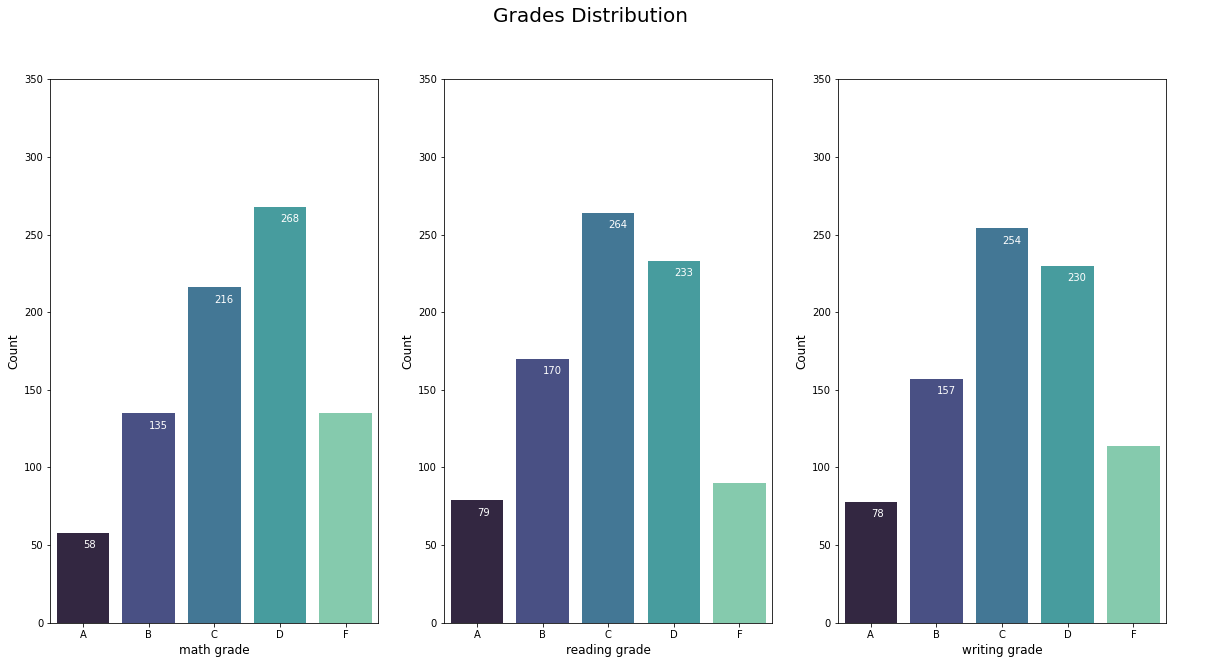

In [36]:
fig, ax = plt.subplots(ncols=3, nrows=1, figsize=(20,10))
index = 0
ax = ax.flatten()

for col in ["math grade", "reading grade", "writing grade"]:
    sns.countplot(data[col], ax=ax[index], order=['A', 'B', 'C', 'D', 'F'], palette="mako")
    ax[index].set_xlabel(xlabel=col, size=12)
    ax[index].set_ylabel(ylabel="Count", size=12)
    ax[index].set_ylim([0, 350])
    # Annotate value labels to each grade
    for i, value in enumerate(data[col].value_counts().sort_index()): 
        ax[index].annotate(value, xy=(i, value-10), color='white') 
    index += 1
    
fig.suptitle("Grades Distribution", fontsize=20);

*   Kategori terbanyak untuk math grade adalah kategori D
*   Kategori terbanyak untuk reading grade adalah kategori C
*   Kategori terbanyak untuk writing grade adalah kategori C





In [32]:
# Overall grade value count
data['overall grade'].value_counts()

C    261
D    256
E    182
B    146
F    103
A     52
Name: overall grade, dtype: int64

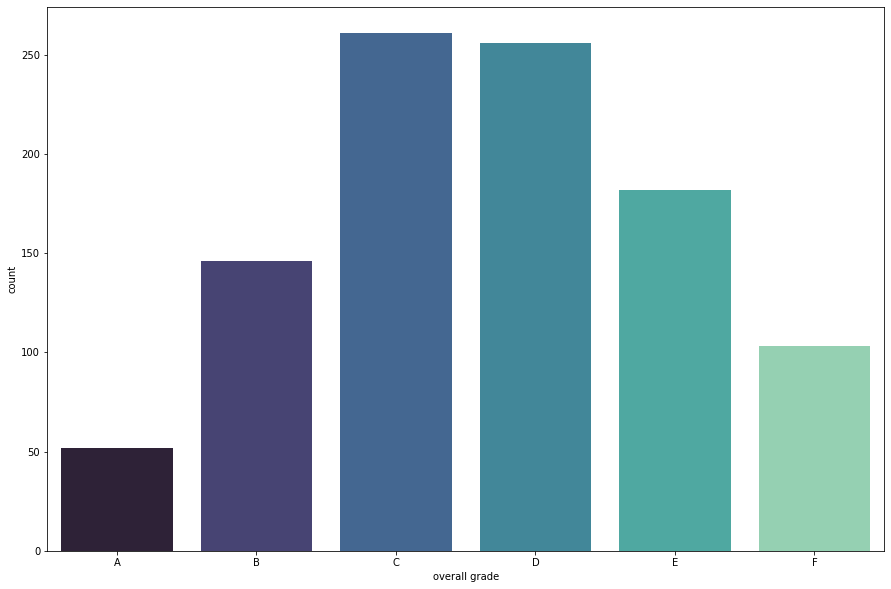

In [ ]:
# Overall grade total visualization
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x="overall grade", data = data, order=['A','B','C','D','E','F'],  palette="mako")
plt.show()

Kategori nilai rerata yang diperoleh siswa terbanyak adalah C, lalu kategori D, E, B, F dan A

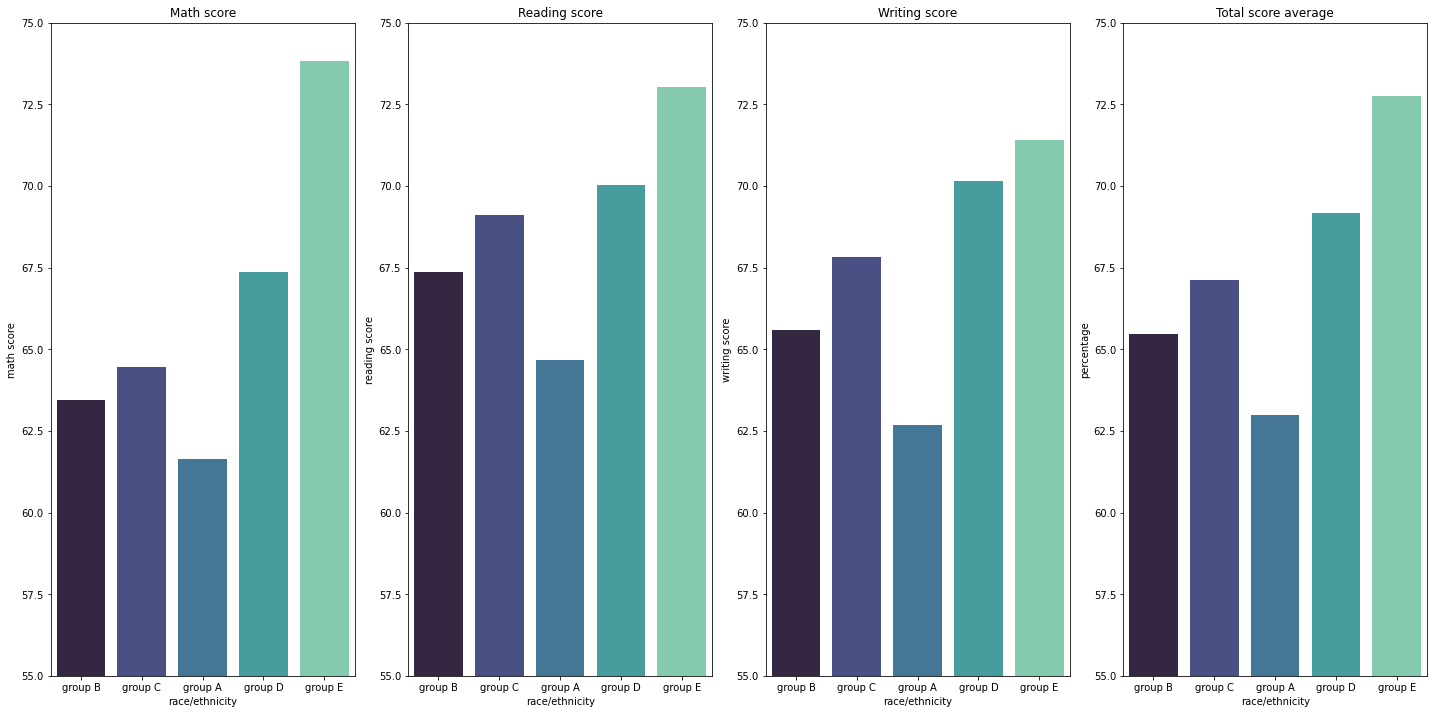

In [ ]:
# Values ​​for each subject and the average of all subjects by racial group
fig , axes = plt.subplots(1,4, figsize=(20,10))
sns.barplot(data = data, x='race/ethnicity', y='math score',ax = axes[0],ci=None,palette='mako')
axes[0].set_title("Math score")
sns.barplot(data = data, x='race/ethnicity', y='reading score',ax = axes[1],ci=None,palette='mako')
axes[1].set_title("Reading score")
sns.barplot(data = data, x='race/ethnicity', y='writing score',ax = axes[2],ci=None,palette='mako')
axes[2].set_title("Writing score")
sns.barplot(data = data, x='race/ethnicity', y='percentage',ax = axes[3],ci=None,palette='mako')
axes[3].set_title("Total score average")

for i in range(0,4):
    axes[i].set_ylim(55,75)

plt.tight_layout(pad=1.0)
plt.show()

Grup E adalah kelompok etnis terbaik untuk math score, reading score, writing score dan total score



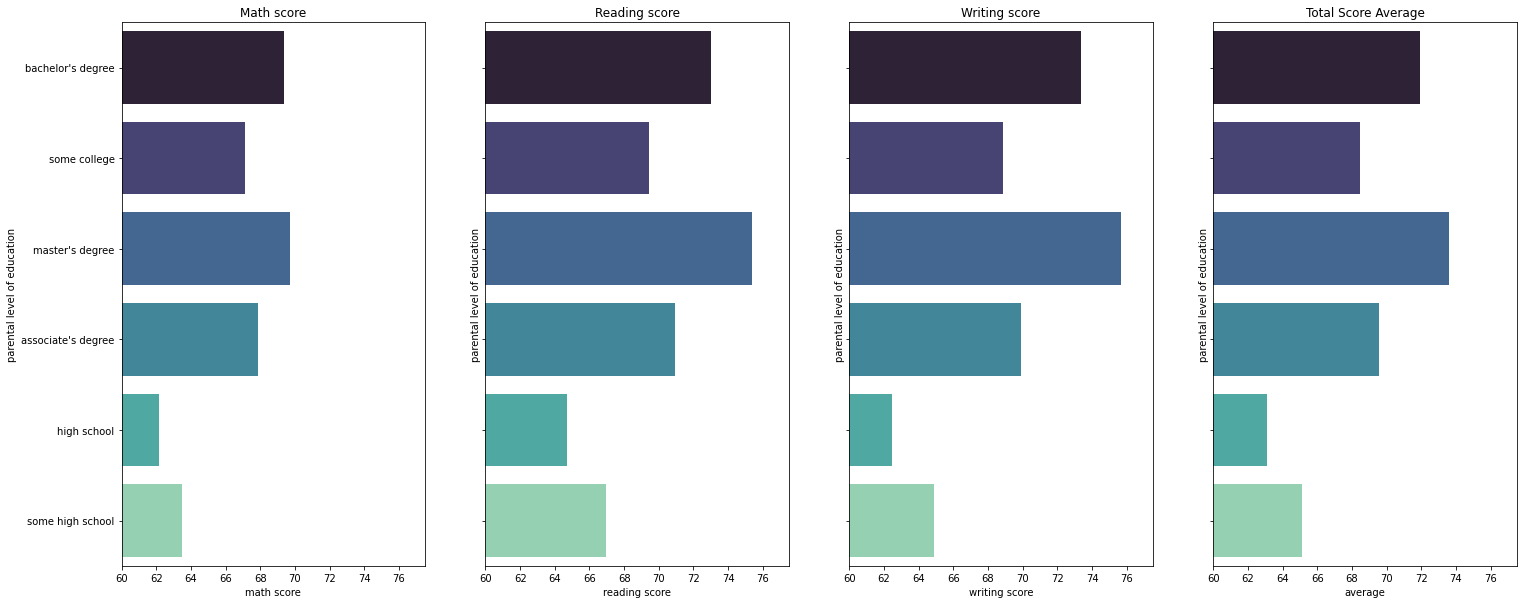

In [37]:
# Parental level of education effect on subject score
fig , axes = plt.subplots(1,4, figsize=(25,10),sharey=True)
sns.barplot(data = data, y='parental level of education', x='math score',ax = axes[0],ci=None,palette='mako')
axes[0].set_title("Math score")
sns.barplot(data = data, y='parental level of education', x='reading score',ax = axes[1],ci=None,palette='mako')
axes[1].set_title("Reading score")
sns.barplot(data = data, y='parental level of education', x='writing score',ax = axes[2],ci=None,palette='mako')
axes[2].set_title("Writing score")
sns.barplot(data = data, y='parental level of education', x='average',ax = axes[3],ci=None,palette='mako')
axes[3].set_title("Total Score Average")
for i in range(0,4):
    axes[i].set_xlim(60,77.5)

plt.show()

- Tingkat pendidikan orang tua berpengaruh terhadap nilai anak.
- Gelar master tertinggi dalam kelompok, Tetapi beberapa sekolah menengah lebih tinggi dari sekolah menengah lainnya

Nilai rata-rata yang memiliki kategori D, E, F dinyatakan gagal 

In [38]:
# Define Function
def overall_status(overall_grade):
  if overall_grade == 'F':
    return 0
  elif overall_grade == 'E':
    return 0
  elif overall_grade == 'D':
    return 0
  else :
    return 1

data["overall status"] = data.apply(lambda x : overall_status(x["overall grade"]), axis=1)

In [39]:
# See the new data
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total scores,average,math grade,reading grade,writing grade,overall grade,overall status
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667,C,C,C,C,1
1,female,group C,some college,standard,completed,69,90,88,247,82.333333,D,A,B,B,1
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667,A,A,A,A,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333,F,E,F,F,0
4,male,group C,some college,standard,none,76,78,75,229,76.333333,C,C,C,C,1


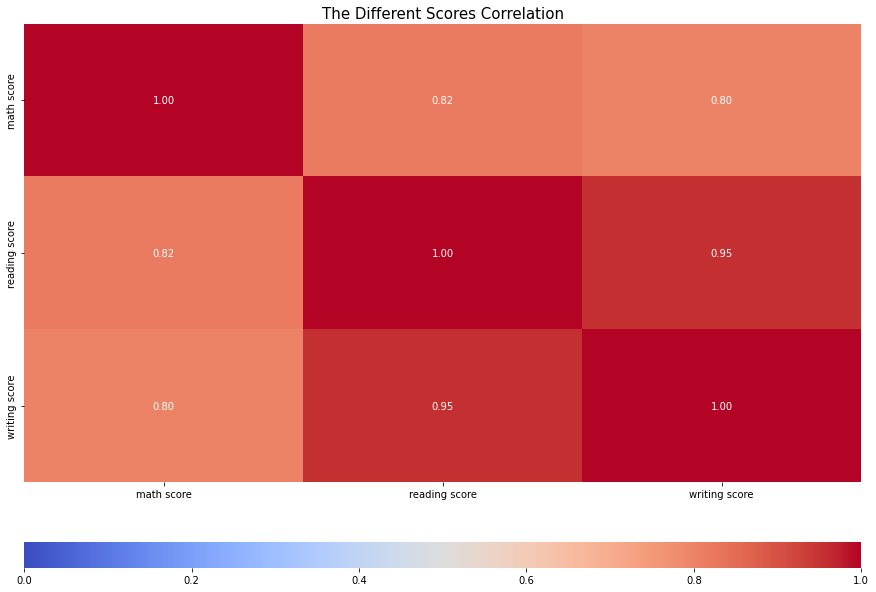

In [ ]:
grid_kws = {"height_ratios": (.9, .05), "hspace": .25}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=(15,10))
sns.heatmap(data[["math score", "reading score", "writing score"]].corr(),
            annot= True,
            fmt = ".2f",
            vmin = 0,
            vmax = 1,
            ax=ax,
            cbar_ax=cbar_ax,
            cbar_kws={"orientation": "horizontal"},
            cmap='coolwarm')
ax.set_title('The Different Scores Correlation', size = 15);

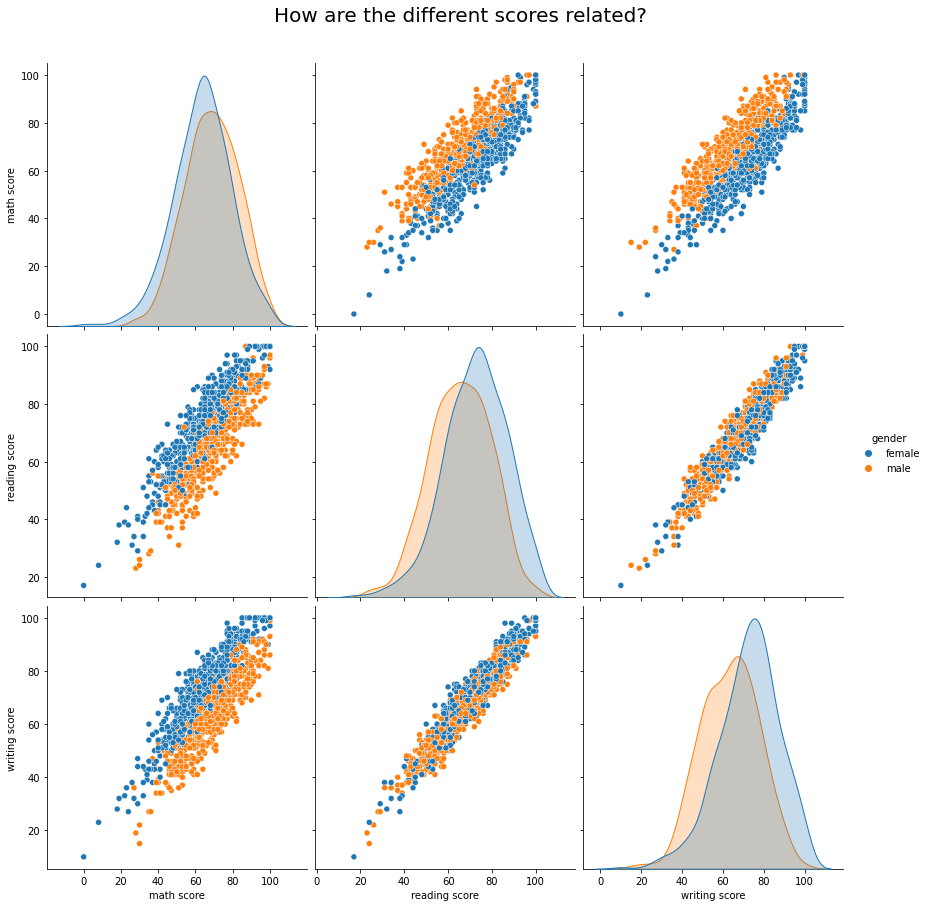

In [ ]:
g = sns.pairplot(data[["math score", "reading score", "writing score", "gender"]], hue="gender", height=4);
g.fig.suptitle("How are the different scores related?", size=20, y=1.05);

# KNN

In [ ]:
#data.drop(['percentage', 'math grade', 'reading grade', 'writing grade', 'total scores', 'overall grade'],axis=1,inplace=True)

#label = data.drop(['math score', 'reading score', 'writing score'],axis=1)

In [ ]:
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,math grade,reading grade,writing grade,total scores,percentage,overall grade,overall status
0,female,group B,bachelor's degree,standard,none,72,72,74,C,C,C,218,72.666667,C,1
1,female,group C,some college,standard,completed,69,90,88,D,A,B,247,82.333333,B,1
2,female,group B,master's degree,standard,none,90,95,93,A,A,A,278,92.666667,A,1
3,male,group A,associate's degree,free/reduced,none,47,57,44,F,E,F,148,49.333333,F,0
4,male,group C,some college,standard,none,76,78,75,C,C,C,229,76.333333,C,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,B,A,A,282,94.000000,A,1
996,male,group C,high school,free/reduced,none,62,55,55,D,E,E,172,57.333333,E,0
997,female,group C,high school,free/reduced,completed,59,71,65,E,C,D,195,65.000000,D,0
998,female,group D,some college,standard,completed,68,78,77,D,C,C,223,74.333333,C,1


In [ ]:
data.dtypes

gender                          object
race/ethnicity                  object
parental level of education     object
lunch                           object
test preparation course         object
math score                       int64
reading score                    int64
writing score                    int64
math grade                      object
reading grade                   object
writing grade                   object
total scores                     int64
percentage                     float64
overall grade                   object
overall status                   int64
dtype: object

In [ ]:
df = pd.get_dummies(data,columns=['gender','race/ethnicity','parental level of education','lunch','test preparation course'])

In [ ]:
df

,math score,reading score,writing score,math grade,reading grade,writing grade,total scores,percentage,overall grade,overall status,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,C,C,C,218,72.666667,C,1,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,D,A,B,247,82.333333,B,1,...,0,0,0,0,1,0,0,1,1,0
2,90,95,93,A,A,A,278,92.666667,A,1,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,F,E,F,148,49.333333,F,0,...,1,0,0,0,0,0,1,0,0,1
4,76,78,75,C,C,C,229,76.333333,C,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,B,A,A,282,94.000000,A,1,...,0,0,0,1,0,0,0,1,1,0
996,62,55,55,D,E,E,172,57.333333,E,0,...,0,0,1,0,0,0,1,0,0,1
997,59,71,65,E,C,D,195,65.000000,D,0,...,0,0,1,0,0,0,1,0,1,0
998,68,78,77,D,C,C,223,74.333333,C,1,...,0,0,0,0,1,0,0,1,1,0


In [ ]:
df.dtypes

math score                                          int64
reading score                                       int64
writing score                                       int64
math grade                                         object
reading grade                                      object
writing grade                                      object
total scores                                        int64
percentage                                        float64
overall grade                                      object
overall status                                      int64
gender_female                                       uint8
gender_male                                         uint8
race/ethnicity_group A                              uint8
race/ethnicity_group B                              uint8
race/ethnicity_group C                              uint8
race/ethnicity_group D                              uint8
race/ethnicity_group E                              uint8
parental level

In [ ]:
grade_dict = {
    'A':5,
    'B':4,
    'C':3,
    'D':2,
    'E':1,
    'F':0
}

df['math grade'] = df['math grade'].map(grade_dict)
df['reading grade'] = df['reading grade'].map(grade_dict)
df['writing grade'] = df['writing grade'].map(grade_dict)
df['overall grade'] = df['overall grade'].map(grade_dict)

In [ ]:
df.dtypes

math score                                          int64
reading score                                       int64
writing score                                       int64
math grade                                          int64
reading grade                                       int64
writing grade                                       int64
total scores                                        int64
percentage                                        float64
overall grade                                       int64
overall status                                      int64
gender_female                                       uint8
gender_male                                         uint8
race/ethnicity_group A                              uint8
race/ethnicity_group B                              uint8
race/ethnicity_group C                              uint8
race/ethnicity_group D                              uint8
race/ethnicity_group E                              uint8
parental level

In [ ]:
df

,math score,reading score,writing score,math grade,reading grade,writing grade,total scores,percentage,overall grade,overall status,...,parental level of education_associate's degree,parental level of education_bachelor's degree,parental level of education_high school,parental level of education_master's degree,parental level of education_some college,parental level of education_some high school,lunch_free/reduced,lunch_standard,test preparation course_completed,test preparation course_none
0,72,72,74,3,3,3,218,72.666667,3,1,...,0,1,0,0,0,0,0,1,0,1
1,69,90,88,2,5,4,247,82.333333,4,1,...,0,0,0,0,1,0,0,1,1,0
2,90,95,93,5,5,5,278,92.666667,5,1,...,0,0,0,1,0,0,0,1,0,1
3,47,57,44,0,1,0,148,49.333333,0,0,...,1,0,0,0,0,0,1,0,0,1
4,76,78,75,3,3,3,229,76.333333,3,1,...,0,0,0,0,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,88,99,95,4,5,5,282,94.000000,5,1,...,0,0,0,1,0,0,0,1,1,0
996,62,55,55,2,1,1,172,57.333333,1,0,...,0,0,1,0,0,0,1,0,0,1
997,59,71,65,1,3,2,195,65.000000,2,0,...,0,0,1,0,0,0,1,0,1,0
998,68,78,77,2,3,3,223,74.333333,3,1,...,0,0,0,0,1,0,0,1,1,0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_train, data_test = train_test_split(df, 
                                     test_size = 0.25, random_state = 1) 

In [ ]:
X_train_data = data_train.loc[:, data_train.columns!='overall status']
y_train_data = data_train.loc[:, data_train.columns=='overall status']

X_test_data = data_test.loc[:, data_test.columns!='overall status']
y_test_data = data_test.loc[:, data_test.columns=='overall status']

In [ ]:
# import random undersampling library 
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# summarize class distribution
print(Counter(y_train_data['overall status']))

# define undersample strategy
undersample = RandomUnderSampler(sampling_strategy='majority')

# fit and apply the transform
X_train_under, y_train_under = undersample.fit_resample(X_train_data, 
                                                        y_train_data)

# summarize class distribution
print(Counter(y_train_under['overall status']))

Counter({0: 411, 1: 339})
Counter({0: 339, 1: 339})


In [ ]:
def evaluate(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    print('Accuracy:', accuracy_score(y_test, y_pred))
    print('------')
    print('Confusion Matrix:')
    print()
    print(classification_report(y_test, y_pred))
    print('------')
    
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    print('Assuming 1 as positive, we get:')
    print('')
    print('True Positive:', tp)
    print('True Negative:', tn)
    print('False Positive:', fp)
    print('False Negative:', fn)
    
    print('')
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    print('Precision:', precision)
    print('Recall:', recall)
    print('F1-Score:', 2 * (precision * recall)/(precision + recall))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train_under, y_train_under)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
evaluate(knn)

Accuracy: 0.996
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       0.99      1.00      1.00       130
           1       1.00      0.99      1.00       120

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

------
Assuming 1 as positive, we get:

True Positive: 119
True Negative: 130
False Positive: 0
False Negative: 1

Precision: 1.0
Recall: 0.9916666666666667
F1-Score: 0.99581589958159


In [ ]:
def evaluate_recall(model, x_test = X_test_data, y_test = y_test_data):
    y_pred = model.predict(x_test)
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
    
    precision = tp/(tp+fp)
    recall = tp/(tp+fn)
    
    return recall

In [ ]:
recall_dict = {
    'n':[],
    'recall':[]
}
for n in [3,5,7,9,11,13,15]:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train_under, y_train_under)
    recall = evaluate_recall(knn)
    recall_dict['n'].append(n)
    recall_dict['recall'].append(recall)
    
recall_df = pd.DataFrame(recall_dict)

In [ ]:
recall_df

,n,recall
0,3,0.991667
1,5,1.000000
2,7,1.000000
3,9,1.000000
4,11,1.000000
5,13,1.000000
6,15,0.991667


# Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train_under, y_train_under)

LogisticRegression()

In [ ]:
evaluate(logreg)

Accuracy: 1.0
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       120

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

------
Assuming 1 as positive, we get:

True Positive: 120
True Negative: 130
False Positive: 0
False Negative: 0

Precision: 1.0
Recall: 1.0
F1-Score: 1.0


# Decision Tree

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train_under, y_train_under)
evaluate(dt)

Accuracy: 1.0
------
Confusion Matrix:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       130
           1       1.00      1.00      1.00       120

    accuracy                           1.00       250
   macro avg       1.00      1.00      1.00       250
weighted avg       1.00      1.00      1.00       250

------
Assuming 1 as positive, we get:

True Positive: 120
True Negative: 130
False Positive: 0
False Negative: 0

Precision: 1.0
Recall: 1.0
F1-Score: 1.0
